In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv")

In [3]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.isnull().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.drop(columns = ['Serial No'],axis= 1,inplace = True)

In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [17]:
df.rename({"Chance of Admit" : "Chance_of_Admit"})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [18]:
## define target and features 
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [19]:
## split into train and test sample 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 2529)

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=2529)

In [22]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [23]:
dtr.score(x_train,y_train)

0.7785259432951297

In [24]:
from sklearn.model_selection import cross_validate

In [28]:
cross_validate(dtr, x_train, y_train, cv=5)

{'fit_time': array([0.00622416, 0.00958943, 0.0077107 , 0.00758028, 0.00808644]),
 'score_time': array([0.00273299, 0.00568056, 0.        , 0.0080092 , 0.        ]),
 'test_score': array([0.58806232, 0.73750389, 0.64056909, 0.78111882, 0.75950226])}

In [29]:
dtr.score(x_test,y_test)

0.7231210105310784

In [30]:
## model hyperparameters

In [32]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [33]:
## hyperparameters selections

In [34]:
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [35]:
## import pipeline 

from sklearn import pipeline

In [36]:
## define pipeline 

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline([('model', dtr)])

In [41]:
## grid search cv 

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params, cv=5)

In [42]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [43]:
# train grid search 

grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [45]:
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

In [46]:
best = grid.best_estimator_

In [47]:
best.fit(x_train, y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [48]:
y_pred = best.predict(x_test)

In [56]:
y_pred

array([0.67641304, 0.67641304, 0.67641304, 0.67641304, 0.51193548,
       0.90653846, 0.9526087 , 0.74927273, 0.83545455, 0.67641304,
       0.51193548, 0.74927273, 0.51193548, 0.76714286, 0.83545455,
       0.67641304, 0.67641304, 0.67641304, 0.74927273, 0.83545455,
       0.61045455, 0.83545455, 0.83545455, 0.9526087 , 0.74927273,
       0.61045455, 0.67641304, 0.51193548, 0.61045455, 0.61045455,
       0.51193548, 0.74927273, 0.74927273, 0.74927273, 0.61045455,
       0.51193548, 0.51193548, 0.83545455, 0.90653846, 0.83545455,
       0.74927273, 0.67641304, 0.67641304, 0.90653846, 0.74927273,
       0.74927273, 0.9526087 , 0.90653846, 0.51193548, 0.51193548,
       0.67641304, 0.67641304, 0.83545455, 0.51193548, 0.67641304,
       0.74927273, 0.67641304, 0.67641304, 0.83545455, 0.67641304,
       0.67641304, 0.9526087 , 0.67641304, 0.67641304, 0.74927273,
       0.67641304, 0.51193548, 0.9526087 , 0.61045455, 0.90653846,
       0.51193548, 0.9526087 , 0.61045455, 0.67641304, 0.51193

In [49]:
# MODEL ERROR

In [50]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [51]:
mean_absolute_error(y_test,y_pred)

0.05877600520797577

In [52]:
mean_absolute_percentage_error(y_test,y_pred)

0.10041674252658511

In [53]:
r2_score(y_test,y_pred)

0.7231210105310784

<IPython.core.display.Javascript object>

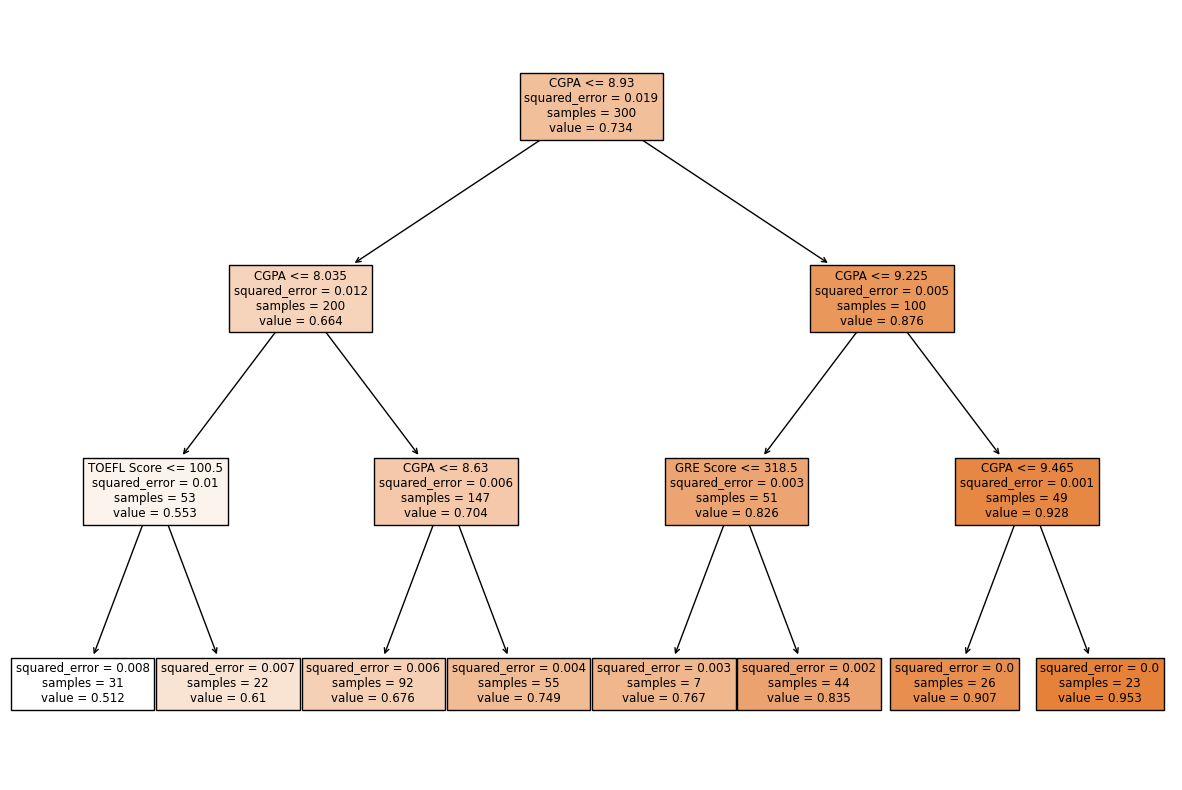

In [55]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(x_train,y_train)
plot_tree(final,feature_names=x.columns,filled=True);